Soumya Mukherjee | CH24M571 | Assignment 4 | Question 1 

In [57]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split                                #For splitting the data into train and test
from sklearn.ensemble import RandomForestClassifier                                 #For Random Forest Classifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix #For model evaluation
from sklearn.metrics import classification_report                                   #For classification report

from sklearn.feature_selection import SelectFromModel

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import GridSearchCV , cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, make_scorer

In [58]:
#dataset = "./data/problem1/assignment4.csv"

# submission


In [59]:
dataset = "./assignment4.csv"

#local

In [60]:
df = pd.read_csv(dataset)

In [61]:
df.isnull().sum()   # checking for any null columns

feature_1     0
feature_2     0
feature_3     0
feature_4     0
feature_5     0
feature_6     0
feature_7     0
feature_8     0
feature_9     0
feature_10    0
feature_11    0
feature_12    0
feature_13    0
feature_14    0
feature_15    0
feature_16    0
feature_17    0
feature_18    0
feature_19    0
feature_20    0
feature_21    0
feature_22    0
feature_23    0
feature_24    0
feature_25    0
feature_26    0
feature_27    0
feature_28    0
feature_29    0
feature_30    0
feature_31    0
feature_32    0
feature_33    0
feature_34    0
feature_35    0
feature_36    0
feature_37    0
feature_38    0
feature_39    0
feature_40    0
feature_41    0
feature_42    0
feature_43    0
feature_44    0
feature_45    0
feature_46    0
feature_47    0
feature_48    0
feature_49    0
feature_50    0
target        0
dtype: int64

In [62]:
# breaking into features and targets 

X= df.drop(['target'],axis=1)
y = df['target']

In [63]:
X.shape , y.shape

((5000, 50), (5000,))

In [64]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=40) # 80:20 split

In [65]:
X_train.shape , X_test.shape , y_train.shape , y_test.shape

((4000, 50), (1000, 50), (4000,), (1000,))

In [66]:
# pre-processing scaling data 

sclr = StandardScaler()
X_train_scaled = sclr.fit_transform(X_train)
X_test_scaled = sclr.transform(X_test)

Random Forest Classifier

In [67]:
# parameter grids 

param_grid_rf = {
    'n_estimators': [100, 150,200 , 300],             # Number of trees in the forest
    'max_features': ['sqrt', 'log2'],           # The number of features to consider when looking for the best split
    'max_depth': [20, 30 , 40],                  # The maximum depth of the tree (to find which one works best for the dataset) - since 50 feat , kept deep
    'min_samples_split': [2, 5, 10],            # Minimum samples required to split a node
    'criterion': ['gini', 'entropy']            # The function to measure the quality of a split (to find which one works best for the dataset)
}

param_grid_aboost = {
    'n_estimators': [50, 100, 200 ,300],             # Number of trees in the forest                   # The base estimator from which the boosted ensemble is built
    'learning_rate': [0.01, 0.05, 0.1, 0.5, 1]  # Learning rate shrinks the contribution of each classifier
}

param_grid_knn = {
    'n_neighbors': [3, 5, 7, 9],             # Number of neighbors to use
    'weights': ['uniform', 'distance'],       # Weight function used in prediction
    'metric': ['euclidean', 'manhattan']      # Distance metric to use for the tree
}



In [68]:
# initializing classifiers 

rf = RandomForestClassifier(random_state=40)
ab = AdaBoostClassifier(estimator=DecisionTreeClassifier(random_state=40),random_state=40)
knn = KNeighborsClassifier()

In [69]:
# performing gridsearchcv for 3 models 

grid_rf = GridSearchCV(estimator=rf,param_grid=param_grid_rf,cv=5,scoring='accuracy',n_jobs=-1)
grid_ab = GridSearchCV(estimator=ab,param_grid=param_grid_aboost,cv=5,scoring='accuracy',n_jobs=-1)
grid_knn = GridSearchCV(estimator=knn,param_grid=param_grid_knn,cv=5,scoring='accuracy',n_jobs=-1)


In [ ]:
grid_rf.fit(X_train_scaled,y_train)

In [ ]:
grid_ab.fit(X_train_scaled,y_train)

GridSearchCV(cv=5,
             estimator=AdaBoostClassifier(estimator=DecisionTreeClassifier(random_state=40),
                                          random_state=40),
             n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.05, 0.1, 0.5, 1],
                         'n_estimators': [50, 100, 150]},
             scoring='accuracy')

In [ ]:
grid_knn.fit(X_train_scaled,y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'metric': ['euclidean', 'manhattan'],
                         'n_neighbors': [3, 5, 7, 9],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')

In [ ]:
# Best estimators in models 

best_rf = grid_rf.best_estimator_
best_rf.fit(X_train_scaled, y_train)

best_ab = grid_ab.best_estimator_
best_ab.fit(X_train_scaled, y_train)

best_knn = grid_knn.best_estimator_
best_knn.fit(X_train_scaled, y_train)


KNeighborsClassifier(metric='euclidean', n_neighbors=9, weights='distance')

In [ ]:
print(f"Best estimator Random Forest:{best_rf}")
print(f"Best estimator adaboost: {best_ab}")
print(f"Best estimator KNN: {best_knn}")

Best estimator Random Forest:RandomForestClassifier(max_depth=30, min_samples_split=5, n_estimators=150,
                       random_state=40)
Best estimator adaboost: AdaBoostClassifier(estimator=DecisionTreeClassifier(random_state=40),
                   learning_rate=0.01, random_state=40)
Best estimator KNN: KNeighborsClassifier(metric='euclidean', n_neighbors=9, weights='distance')


In [ ]:
# # printing 
# # Best parameters rf
# print(f"Best Hyperparameters: {best_rf.best_params_}")   # Prints the best hyperparameter combination 
# print(f"Best Score: {best_rf.best_score_}")              # best cross-validation accuracy score
# print(f"Best Estimator: {best_rf.best_estimator_}")      # Retrieves the best-tuned Random Forest model

# print("\n")  # add a line break for better readability

# # Best parameters adaboost
# print(f"Best Hyperparameters: {grid_ab.best_params_}")   # Prints the best hyperparameter combination 
# print(f"Best Score: {grid_ab.best_score_}")              # best cross-validation accuracy score
# print(f"Best Estimator: {grid_ab.best_estimator_}")      # Retrieves the best-tuned AdaBoost model

# print("\n")  # add a line break for better readability

# # Best parameters knn
# print(f"Best Hyperparameters: {grid_knn.best_params_}")   # Prints the best hyperparameter combination 
# print(f"Best Score: {grid_knn.best_score_}")              # best cross-validation accuracy score
# print(f"Best Estimator: {grid_knn.best_estimator_}")      # Retrieves the best-tuned KNN model


In [ ]:
def evaluate_model(model , X_test_scaled , y_test):
    y_pred = model.predict(X_test_scaled)

    accuracy = accuracy_score(y_test, y_pred)

    print(f'Accuracy of {model} is : {accuracy}')

    # Classification report
    print(classification_report(y_test, y_pred))
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    return accuracy, precision, recall, f1

In [ ]:
metrics_rf = evaluate_model(best_rf , X_test_scaled , y_test)
metrics_ab = evaluate_model(best_ab , X_test_scaled , y_test)
metrics_knn = evaluate_model(best_knn , X_test_scaled , y_test)


Accuracy of RandomForestClassifier(max_depth=30, min_samples_split=5, n_estimators=150,
                       random_state=40) is : 0.655
              precision    recall  f1-score   support

           0       0.63      0.97      0.76       507
           1       0.75      0.47      0.58       301
           2       0.80      0.12      0.22       192

    accuracy                           0.66      1000
   macro avg       0.72      0.52      0.52      1000
weighted avg       0.70      0.66      0.60      1000

Accuracy of AdaBoostClassifier(estimator=DecisionTreeClassifier(random_state=40),
                   learning_rate=0.01, random_state=40) is : 0.485
              precision    recall  f1-score   support

           0       0.61      0.57      0.59       507
           1       0.43      0.47      0.45       301
           2       0.27      0.28      0.27       192

    accuracy                           0.48      1000
   macro avg       0.44      0.44      0.44      1000
weigh

In [ ]:
# performing K-Cross validation 

cv_rf = np.mean(cross_val_score(best_rf, X_train, y_train, cv=5))
cv_ab = np.mean(cross_val_score(best_ab, X_train, y_train, cv=5))
cv_knn = np.mean(cross_val_score(best_knn, X_train, y_train, cv=5))
print("Cross-validation Scores:", cv_rf, cv_ab, cv_knn)


Cross-validation Scores: 0.648 0.46799999999999997 0.626


In [ ]:
# Plotting the confusion matrices 

# Plot confusion matrices
def plot_confusion_matrix(model, X_test, y_test, title):
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=[0, 1, 2], yticklabels=[0, 1, 2])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(title)
    plt.show()

c:\Users\aymuo\.pyenv\pyenv-win\versions\3.12.0\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


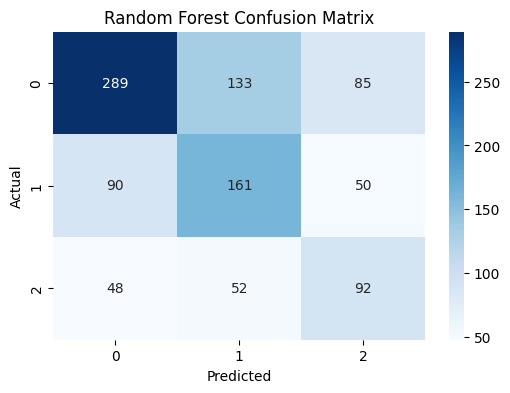

c:\Users\aymuo\.pyenv\pyenv-win\versions\3.12.0\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but AdaBoostClassifier was fitted without feature names
  warnings.warn(


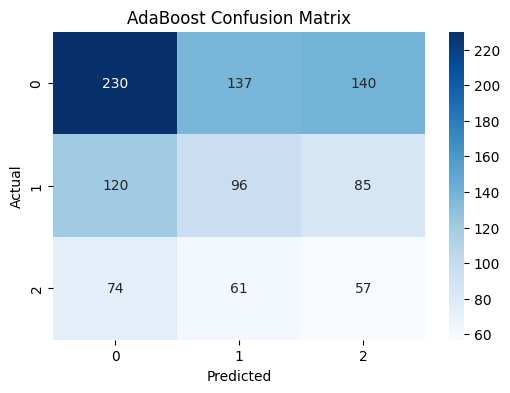

c:\Users\aymuo\.pyenv\pyenv-win\versions\3.12.0\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(


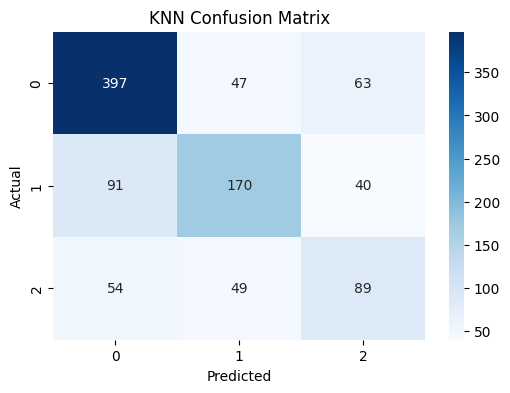

In [ ]:
plot_confusion_matrix(best_rf, X_test, y_test, "Random Forest Confusion Matrix")
plot_confusion_matrix(best_ab, X_test, y_test, "AdaBoost Confusion Matrix")
plot_confusion_matrix(best_knn, X_test, y_test, "KNN Confusion Matrix")

Redundant Code

In [ ]:
# model = RandomForestClassifier(random_state=40)

# param_grid = {
#     'n_estimators': [100, 150,200 , 300],             # Number of trees in the forest
#     'max_features': ['sqrt', 'log2'],           # The number of features to consider when looking for the best split
#     'max_depth': [20, 30 , 40],                  # The maximum depth of the tree (to find which one works best for the dataset) - since 50 feat , kept deep
#     'min_samples_split': [2, 5, 10],            # Minimum samples required to split a node
#     'criterion': ['gini', 'entropy']            # The function to measure the quality of a split (to find which one works best for the dataset)
# }

# # Grid search
# grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
# grid_search.fit(X_train_scaled, y_train)

# # Best parameters
# print(f"Best Hyperparameters: {grid_search.best_params_}")   # Prints the best hyperparameter combination 
# print(f"Best Score: {grid_search.best_score_}")              # best cross-validation accuracy score
# print(f"Best Estimator: {grid_search.best_estimator_}")      # Retrieves the best-tuned Random Forest model

# # Best estimator
# best_model_randForest = grid_search.best_estimator_

# # Model evaluation
# y_pred = best_model_randForest.predict(X_test_scaled)
# accuracy = accuracy_score(y_test, y_pred)
# print(f'Accuracy: {accuracy}')

# # Classification report
# print(classification_report(y_test, y_pred))

In [ ]:
# # Building model

# # model2 = RandomForestClassifier(bootstrap=False, criterion='entropy', max_depth=20, min_samples_split=5, random_state=42)
# best_model_randForest.fit(X_train, y_train)